### This note book is for the second questions 
####  Q2 : What is the relationship between the number of Reviews and prices

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_calendar=pd.read_csv('C:/Users/wizchu/DS/calendar.csv')
df_listings = pd.read_csv('C:/Users/wizchu/DS/listings.csv')
df_reviews = pd.read_csv('C:/Users/wizchu/DS/reviews.csv')

In [11]:
# First, pick the columns that I think it is relative with this questions
# I am going to look into price, number_of_reviews, review_scores_rating, so these are the three columns I will use 
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

### Preparing the data

In [12]:
#checking the NaN 
df_listings[['price','review_scores_rating','number_of_reviews']].isnull().sum()

price                     0
review_scores_rating    647
number_of_reviews         0
dtype: int64

In [13]:
# dropping NAN in 'review_scores_rating'
df_listings1=df_listings.dropna(subset = ['review_scores_rating']) 

In [14]:
# remove the $ from price 
df_listings1['price'] = df_listings1['price'].str.replace("[$, ]", "").astype("float")

<ipython-input-14-20c157e62c1e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings1['price'] = df_listings1['price'].str.replace("[$, ]", "").astype("float")
<ipython-input-14-20c157e62c1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings1['price'] = df_listings1['price'].str.replace("[$, ]", "").astype("float")


### Understanding the data

In [104]:
df_listings1[['price','review_scores_rating']].describe()

,price,review_scores_rating
count,3171.000000,3171.000000
mean,126.802586,94.539262
std,90.007172,6.606083
min,22.000000,20.000000
25%,75.000000,93.000000
50%,100.000000,96.000000
75%,150.000000,99.000000
max,1000.000000,100.000000


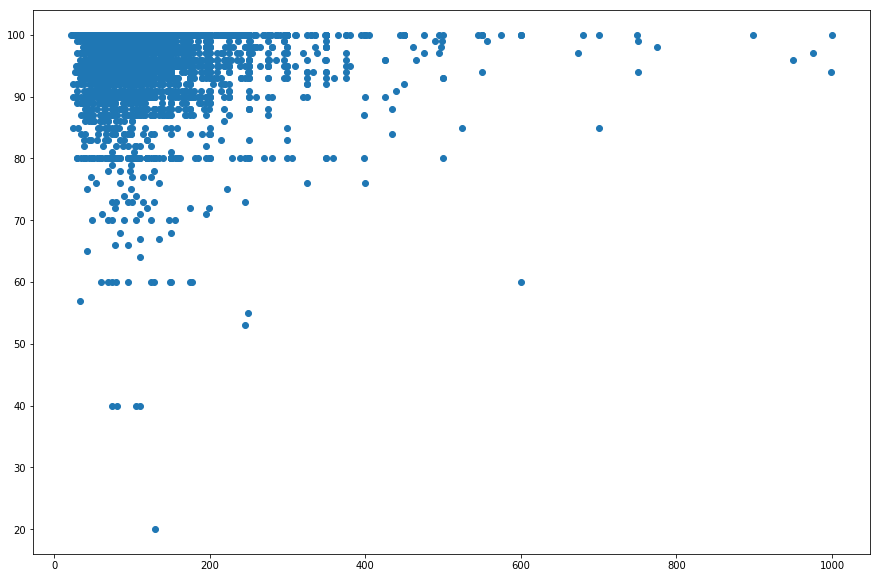

In [106]:
# relationship between price and review_scores_rating
x=df_listings1['price']
y=df_listings1['review_scores_rating']
plt.subplots(figsize = (15,10))
plt.scatter(x, y)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b215b38>]],
      dtype=object)

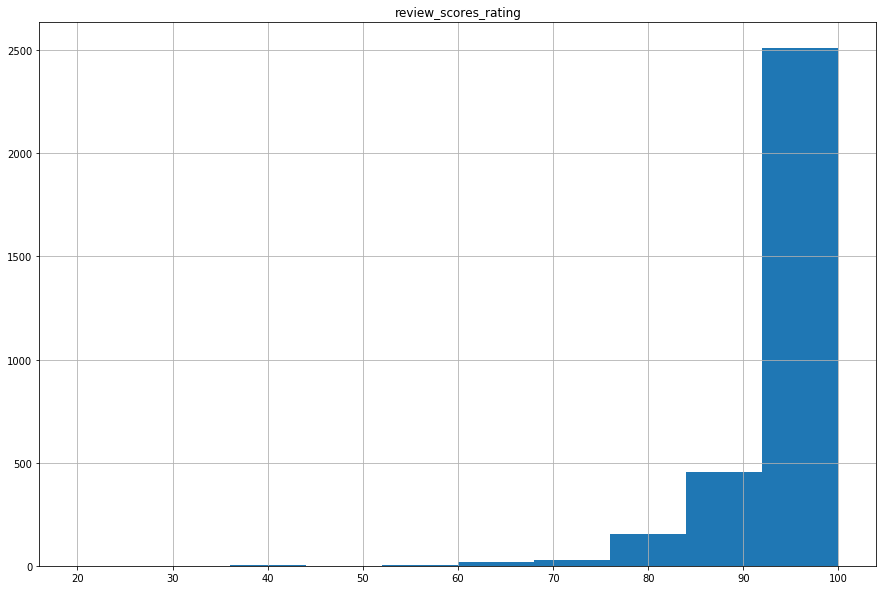

In [108]:
#what rating does most of the listings have 
# most of the listings have above 90 rating 
df_listings1.hist('review_scores_rating', bins=10, figsize=(15,10))

Text(0, 0.5, ' Listings ')

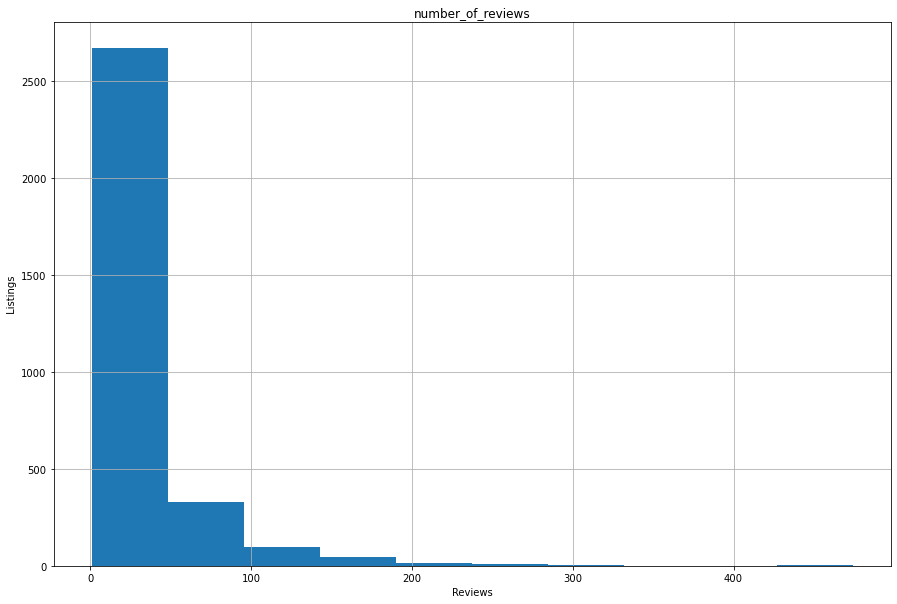

In [80]:
#how many reviews does most of the listing have 
#most of the rating has about 50 number of reviews 
df_listings1.hist('number_of_reviews', bins=10, figsize=(15,10))
plt.xlabel('Reviews')
plt.ylabel(' Listings ')

Text(0, 0.5, ' Number of Reviews ')

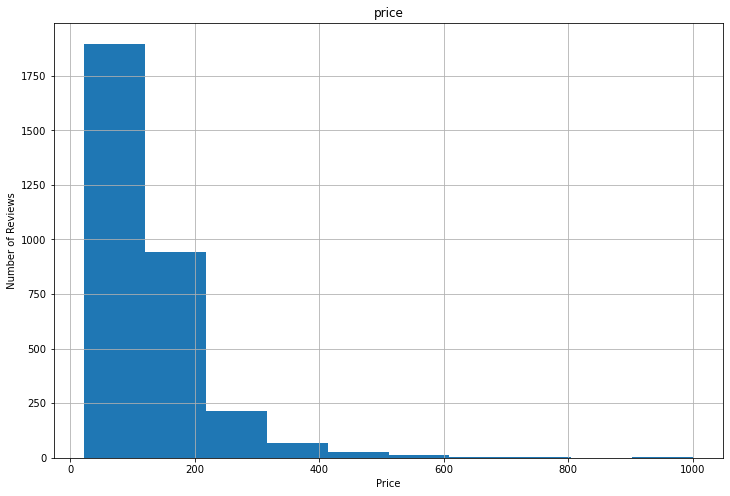

In [82]:
# waht are the price for most of the listing 
df_listings1.hist('price', bins=10, figsize=(12,8))
plt.xlabel('Price')
plt.ylabel(' Number of Reviews ')

In [27]:
# drop the NaN for number_of_reviews
df_listings2=df_listings.dropna(subset = ['number_of_reviews']) 
# remove the $ from price 
df_listings2['price'] = df_listings2['price'].str.replace("[$, ]", "").astype("float")

<ipython-input-27-b5d54b0e780a>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings2['price'] = df_listings2['price'].str.replace("[$, ]", "").astype("float")


In [37]:
# seems I know most of the listing is between 50 to 0, I will like to know their price 
# i create a dataset for the two column 
df_listings2=df_listings2[['number_of_reviews','price']]

In [55]:
# the average price of the number_of_reviews <= 50 listings and the count 
print(df_listings2['price'].loc[df_listings2['number_of_reviews'] <=50].mean())
print(df_listings2['price'].loc[df_listings2['number_of_reviews'] <=50].count())

131.89754343918514
3338


In [57]:
# the average price of the total number_of_reviews listings and the count 
print(df_listings2['price'].count())
print(df_listings2['price'].mean())

3818
127.97616553169199


In [58]:
# the average price of the number_of_reviews > 50 listings and the count 
print(df_listings2['price'].loc[df_listings2['number_of_reviews'] >50].mean())
print(df_listings2['price'].loc[df_listings2['number_of_reviews'] >50].count())

100.70625
480


#### the listings with number_of_reviews over 50 has the higher price of <= 50. I want to look into more details, so I decieded to check the listings under 50 review, to see if that still the trend. Therefore, from I created a set for listing with under 50 reviews. 


In [64]:
df_listings2_50=df_listings2.loc[df_listings2['number_of_reviews'] <=50]

In [72]:
# I put the set into five groups, the goups have simialar numbers of records. This will tell me the price trend
df_listings2_50['Bins'] =  pd.qcut(df_listings2_50['number_of_reviews'], 5)
df_listings2_50['Bins'].value_counts()

<ipython-input-72-be95522e7593>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2_50['Bins'] =  pd.qcut(df_listings2_50['number_of_reviews'], 5)


(-0.001, 1.0]    937
(10.0, 21.0]     647
(21.0, 50.0]     642
(4.0, 10.0]      571
(1.0, 4.0]       541
Name: Bins, dtype: int64

In [73]:
df_listings2_50.groupby(['Bins'])['price'].mean()

Bins
(-0.001, 1.0]    138.780149
(1.0, 4.0]       134.595194
(4.0, 10.0]      140.150613
(10.0, 21.0]     122.265842
(21.0, 50.0]     121.945483
Name: price, dtype: float64

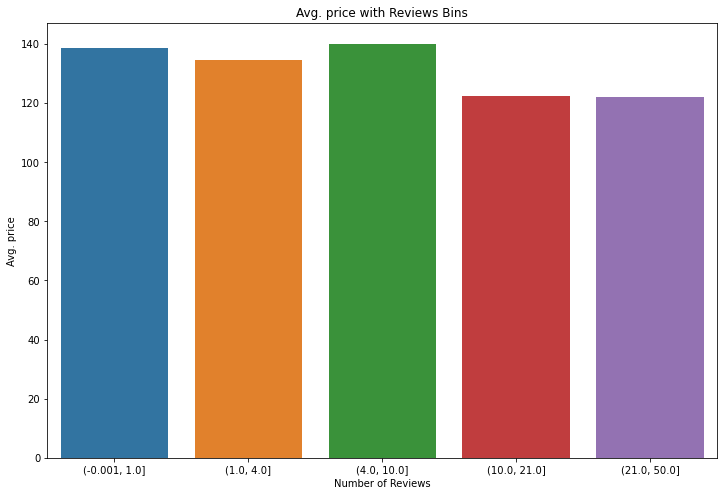

In [75]:
#plot the chart for the bin of number_of_reviews
plt.figure(figsize=(12,8))
sns.barplot(data=df_listings2_50.groupby(['Bins']).mean(), x = df_listings2_50.groupby(['Bins']).mean().index , y = df_listings2_50.groupby(['Bins'])['price'].mean())
plt.ylabel('Avg. price')
plt.xlabel('Number of Reviews')
plt.title('Avg. price with Reviews Bins');

#### so based on above chart, we can find out that the higher number of reviews do have lower price. Let look at the price chart see if that also the case. 

In [60]:
# I think most of the listing has price under 200, so let check about the reviews number for listing under $200
print(df_listings2['number_of_reviews'].loc[df_listings2['price'] <=200].mean())
print(df_listings2['number_of_reviews'].loc[df_listings2['price'] <=200].count())

print(df_listings2['number_of_reviews'].loc[df_listings2['price'] >200].mean())
print(df_listings2['number_of_reviews'].loc[df_listings2['price'] >200].count())

print(df_listings2['number_of_reviews'].count())
print(df_listings2['number_of_reviews'].mean())


23.771496578399287
3361
10.838074398249454
457
3818
22.22341540073337


In [65]:
# I create a dataset for listing under $200 
df_listings2_200=df_listings2.loc[df_listings2['price'] <=200]

In [67]:
# put the listings into 5 groups, to see if we using price bin the trend is also consistent with the chart I had above
df_listings2_200['pricebin'] =  pd.qcut(df_listings2_200['price'], 5)
df_listings2_200['pricebin'].value_counts()

<ipython-input-67-442e3ea75588>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2_200['pricebin'] =  pd.qcut(df_listings2_200['price'], 5)


(19.999, 65.0]    717
(87.0, 105.0]     673
(140.0, 200.0]    668
(105.0, 140.0]    667
(65.0, 87.0]      636
Name: pricebin, dtype: int64

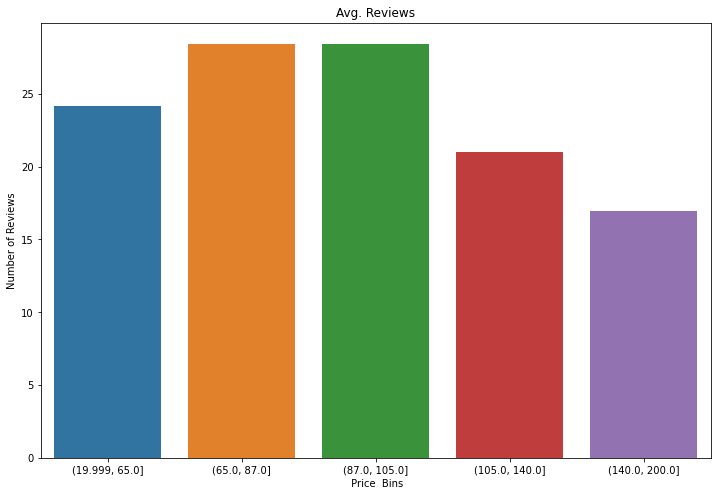

In [70]:
#plot the chart for the bin of number_of_reviews
plt.figure(figsize=(12,8))
sns.barplot(data=df_listings2_200.groupby(['pricebin']).mean(), x = df_listings2_200.groupby(['pricebin']).mean().index , y = df_listings2_200.groupby(['pricebin'])['number_of_reviews'].mean())
plt.ylabel('Number of Reviews')
plt.xlabel(' Price  Bins')
plt.title('Avg. Reviews');

### The Avg. review chart here also showing the trends that higher numbers of review lower price

In [ ]:
df_listings2.loc[]

df_calendar[(df_calendar['listing_id'] ==241032)]
df_calendar.loc[df_calendar['available'] =='f']

In [25]:
# plot the review_scores_rating bin
plt.figure(figsize=(12,8)) 
sns.barplot(data=df_listings1.groupby(["ratingBins"]).mean(), x = df_listings1.groupby(["ratingBins"]).mean().index , y = df_listings1.groupby(["ratingBins"])['price'].mean())
plt.ylabel('Avg. price')
plt.xlabel('review_scores_rating')
plt.title('Avg. price for Bins');

KeyError: 'ratingBins'

<Figure size 864x576 with 0 Axes>

In [78]:
# create the price bin
df_listings1['PriceBins'] =  pd.qcut(df_listings1['price'], 4)

In [81]:
df_listings1.groupby(["PriceBins"])["review_scores_rating"].mean()

PriceBins
(21.999, 75.0]     94.133795
(75.0, 100.0]      94.706737
(100.0, 150.0]     94.390215
(150.0, 1000.0]    95.032440
Name: review_scores_rating, dtype: float64

In [109]:
# create 4 equal bins
df_listings1['ratingBins'] =  pd.qcut(df_listings1['review_scores_rating'], 4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
df_listings2['price'] = df_listings2['price'].str.replace("[$, ]", "").astype("float")

In [133]:
#then create a price bin 
df_listings2['PriceBins'] =  pd.qcut(df_listings2['price'], 5)

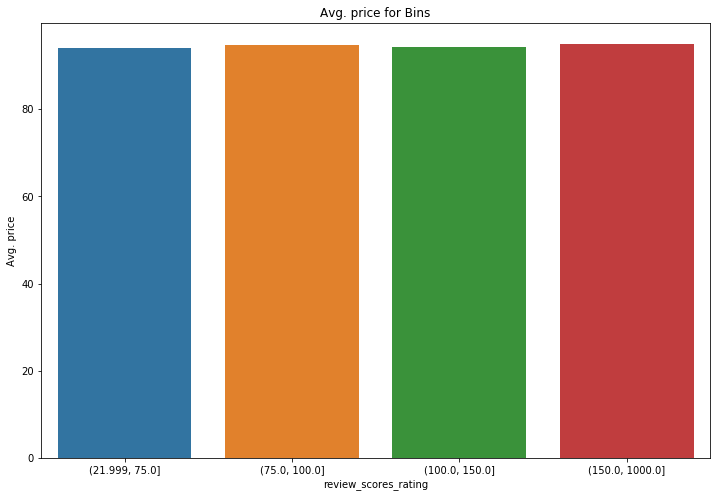

In [79]:
# plot the price bin chart 
plt.figure(figsize=(12,8))
sns.barplot(data=df_listings1.groupby(["PriceBins"]).mean(), x = df_listings1.groupby(["PriceBins"]).mean().index , y = df_listings1.groupby(["PriceBins"])['review_scores_rating'].mean())
plt.ylabel('Avg. price')
plt.xlabel('review_scores_rating')
plt.title('Avg. price for Bins');

In [110]:
# number of records in the bins
df_listings1['ratingBins'].value_counts()

(19.999, 93.0]    950
(99.0, 100.0]     781
(93.0, 96.0]      736
(96.0, 99.0]      704
Name: ratingBins, dtype: int64

In [135]:
df_listings2['PriceBins'].value_counts()

(92.0, 120.0]      823
(19.999, 69.0]     816
(169.0, 1000.0]    756
(69.0, 92.0]       712
(120.0, 169.0]     711
Name: PriceBins, dtype: int64

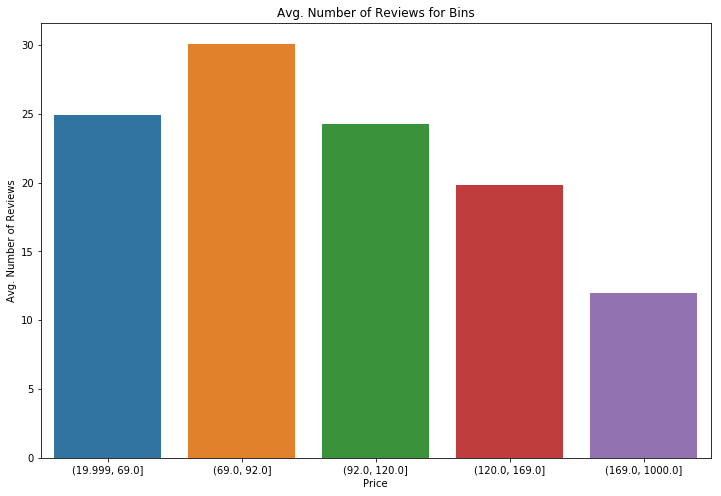

In [134]:
#plot the chart 
plt.figure(figsize=(12,8))
sns.barplot(data=df_listings2.groupby(["PriceBins"]).mean(), x = df_listings2.groupby(["PriceBins"]).mean().index , y = df_listings2.groupby(["PriceBins"])['number_of_reviews'].mean())
plt.ylabel('Avg. Number of Reviews')
plt.xlabel('Price')
plt.title('Avg. Number of Reviews for Bins');

In [136]:
df_listings2.groupby(["PriceBins"])["number_of_reviews"].mean()

PriceBins
(19.999, 69.0]     24.935049
(69.0, 92.0]       30.091292
(92.0, 120.0]      24.235723
(120.0, 169.0]     19.822785
(169.0, 1000.0]    11.953704
Name: number_of_reviews, dtype: float64